In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()
X = digits.images  
y = digits.target 

In [3]:
X.shape, y.shape

((1797, 8, 8), (1797,))

0

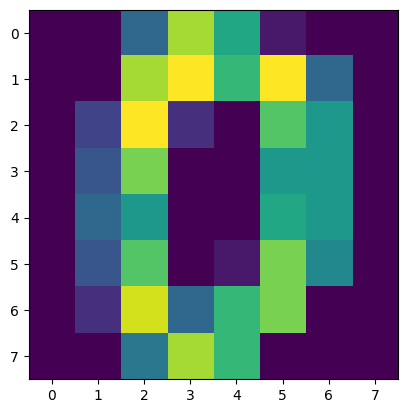

In [4]:
plt.imshow(X[0])
y[0]

In [5]:
X = X.reshape(X.shape[0], -1) / 16 

In [6]:
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((y.size, num_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

y_one_hot = one_hot_encode(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


In [7]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.01, epochs=1000):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.W1 = np.random.randn(self.input_size, self.hidden_size1) * np.sqrt(1 / self.input_size)
        self.b1 = np.zeros((1, self.hidden_size1))
        self.W2 = np.random.randn(self.hidden_size1, self.hidden_size2) * np.sqrt(1 / self.hidden_size1)
        self.b2 = np.zeros((1, self.hidden_size2))
        self.W3 = np.random.randn(self.hidden_size2, self.output_size) * np.sqrt(1 / self.hidden_size2)
        self.b3 = np.zeros((1, self.output_size))
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, A):
        return A * (1 - A)  
    
    def compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred + 1e-9))  #Cross-entropy loss
    
    def train(self, X, y):
        losses = []
        for epoch in range(self.epochs):
            #forward pass
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.sigmoid(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.sigmoid(Z2)
            Z3 = np.dot(A2, self.W3) + self.b3
            A3 = self.softmax(Z3)
            
            loss = self.compute_loss(y, A3)
            losses.append(loss)
            
            # Backpropagation
            dZ3 = A3 - y  
            dW3 = np.dot(A2.T, dZ3) / X.shape[0]
            db3 = np.sum(dZ3, axis=0, keepdims=True) / X.shape[0]
            
            dA2 = np.dot(dZ3, self.W3.T)
            dZ2 = dA2 * self.sigmoid_derivative(A2)
            dW2 = np.dot(A1.T, dZ2) / X.shape[0]
            db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]
            
            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self.sigmoid_derivative(A1)
            dW1 = np.dot(X.T, dZ1) / X.shape[0]
            db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]
            
            #update weights
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1
            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2
            self.W3 -= self.learning_rate * dW3
            self.b3 -= self.learning_rate * db3
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.sigmoid(Z2)  
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = self.softmax(Z3)  
        return np.argmax(A3, axis=1)


In [8]:
nn = NeuralNetwork(input_size=64, hidden_size1=256, hidden_size2=128, output_size=10, learning_rate=0.1, epochs=2500)
losses = nn.train(X_train, y_train)

Epoch 0, Loss: 0.2443
Epoch 100, Loss: 0.2250
Epoch 200, Loss: 0.2184
Epoch 300, Loss: 0.2076
Epoch 400, Loss: 0.1882
Epoch 500, Loss: 0.1575
Epoch 600, Loss: 0.1241
Epoch 700, Loss: 0.0984
Epoch 800, Loss: 0.0806
Epoch 900, Loss: 0.0678
Epoch 1000, Loss: 0.0581
Epoch 1100, Loss: 0.0506
Epoch 1200, Loss: 0.0447
Epoch 1300, Loss: 0.0399
Epoch 1400, Loss: 0.0360
Epoch 1500, Loss: 0.0327
Epoch 1600, Loss: 0.0299
Epoch 1700, Loss: 0.0275
Epoch 1800, Loss: 0.0255
Epoch 1900, Loss: 0.0237
Epoch 2000, Loss: 0.0222
Epoch 2100, Loss: 0.0208
Epoch 2200, Loss: 0.0196
Epoch 2300, Loss: 0.0186
Epoch 2400, Loss: 0.0177


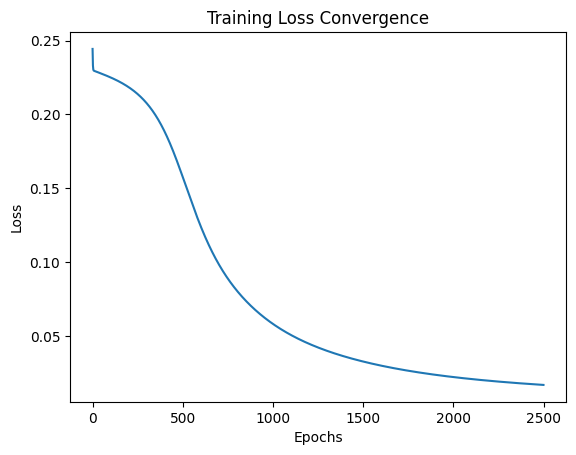

Test Accuracy: 94.17%


<Axes: >

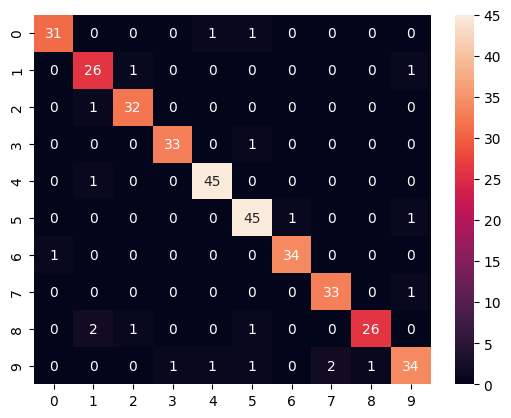

In [9]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Convergence")
plt.show()

y_pred = nn.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred == y_test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d')